# OVERVIEW
## Description
### Context
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below. <br>

### Content
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:<br>
1. Age (numeric) <br>
2. Sex (text: male, female) <br>
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled) <br>
4. Housing (text: own, rent, or free)<br>
5. Saving accounts (text - little, moderate, quite rich, rich)<br>
6. Checking account (numeric, in DM - Deutsch Mark)<br>
7. Credit amount (numeric, in DM)<br>
8. Duration (numeric, in month)<br>
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)<br>

## 1) Introduction
Clustering is the **process of making a group** of abstract objects into classes of **similar objects.**

Points to Remember:
    > A cluster of data objects can be treated as one group.
    > While doing cluster analysis, we first partition the set of data into groups based on data similarity and then assign the labels to the groups.
    > The main advantage of clustering over classification is that, it is adaptable to changes and helps single out useful features that distinguish different groups.

## 2) Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#import visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
import scipy.stats as stats

#import preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#import algorithm
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

## 3) Peak the Dataset

In [2]:
dfa = pd.read_csv('german_credit_data.csv')
df = dfa.drop(columns=['Unnamed: 0'], axis=1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [4]:
df.shape

(1000, 9)

In [5]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


## 4) Data Preparation

In [6]:
df.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

In [7]:
#detect percentage of missing value which above 60%
null = df.isnull().sum().sort_values(ascending=False)
print('Percentage of missing value is', round((null[0]/1000)* 100)) #checking acc
print('Percentage of missing value is', round((null[1]/1000)* 100)) #saving acc
#condition
#percentage missing value of checking and saving acc is less than 60%

Percentage of missing value is 39.0
Percentage of missing value is 18.0


In [8]:
#detect unique values
n_unique = df.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64


In [9]:
print("Unique values in each categorical column:")
for col in df.select_dtypes(include=[object]):
    print(col,":", df[col].unique())

Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [10]:
a = df[df.Job==2]
a

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
...,...,...,...,...,...,...,...,...,...
987,64,female,2,own,moderate,NaN,1409,13,radio/TV
994,50,male,2,own,NaN,NaN,2390,12,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [11]:
#split data to numerical and categorical
category = ['Sex','Job','Housing','Saving accounts',
            'Checking account','Purpose']
numerical  = df.drop(category, axis=1)
categorical = df[category]
numerical.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


In [12]:
categorical.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
0,male,2,own,NaN,little,radio/TV
1,female,2,own,little,moderate,radio/TV
2,male,1,own,little,NaN,education
3,male,2,free,little,little,furniture/equipment
4,male,2,free,little,little,car


In [13]:
#fill value in categorical
for cat in categorical:
    mode = categorical[cat].mode().values[0]
    categorical[cat]=df[cat].fillna(mode)

In [14]:
#detect categorical missing value
categorical.isnull().sum().sort_values(ascending=False) 

Purpose             0
Checking account    0
Saving accounts     0
Housing             0
Job                 0
Sex                 0
dtype: int64

In [15]:
#concat table categorical and numerical
dfinal = pd.concat([categorical,numerical],axis=1)
dfinal.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Age,Credit amount,Duration
0,male,2,own,little,little,radio/TV,67,1169,6
1,female,2,own,little,moderate,radio/TV,22,5951,48
2,male,1,own,little,little,education,49,2096,12
3,male,2,free,little,little,furniture/equipment,45,7882,42
4,male,2,free,little,little,car,53,4870,24


### Encode Categorical Data

In [16]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [17]:
# apply le on categorical feature columns
dfinal = dfinal.apply(lambda col: le.fit_transform(col))
dfinal.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Age,Credit amount,Duration
0,1,2,1,0,0,5,48,142,2
1,0,2,1,0,1,5,3,770,29
2,1,1,1,0,0,3,30,390,8
3,1,2,0,0,0,4,26,848,26
4,1,2,0,0,0,1,34,734,17


### Exploratory Data Analysis

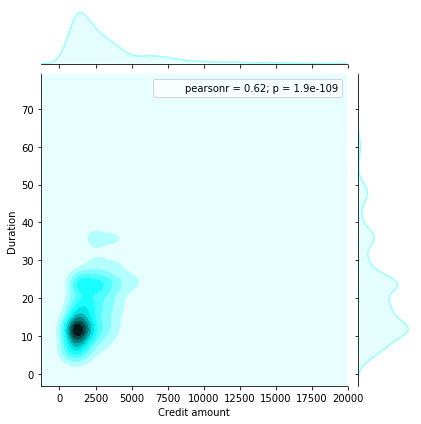

In [18]:
r1 = sns.jointplot(x="Credit amount",y="Duration", data=df, kind="kde", color="#99ffff")
r1.annotate(stats.pearsonr)
plt.show()

It shows relationships between Duration and Credit Amount, that most of all credit amount is range 500-2000 with duration 8-15

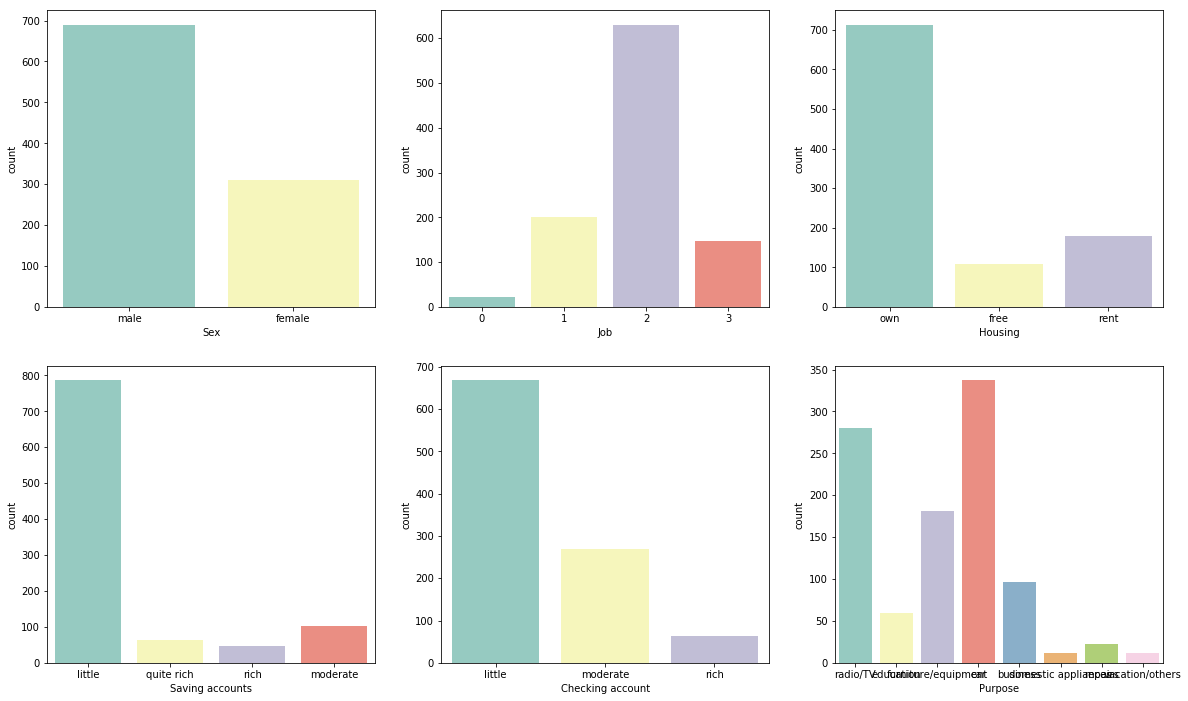

In [19]:
fig=plt.figure(figsize=(20,12))
axes=230
#put data categorical
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    #set title of cat
    sns.countplot(data = categorical, x=cat, palette="Set3") 
plt.show()

Explanation:<br>
1. Sex countplots show that sex = male takes the most credit in the bank
2. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled). Job countplot shows that job
3. Coutplot housing shows that people who do credit on average have a private home ownership
4. About -800 people who take credit at the bank are people who fall into the category of little for classification in a savings account that is not done every day
5. Whereas around -700 borrowers have daily checking account intensity for the type of little loan
6. The goal of most people taking credit is for vacation / others

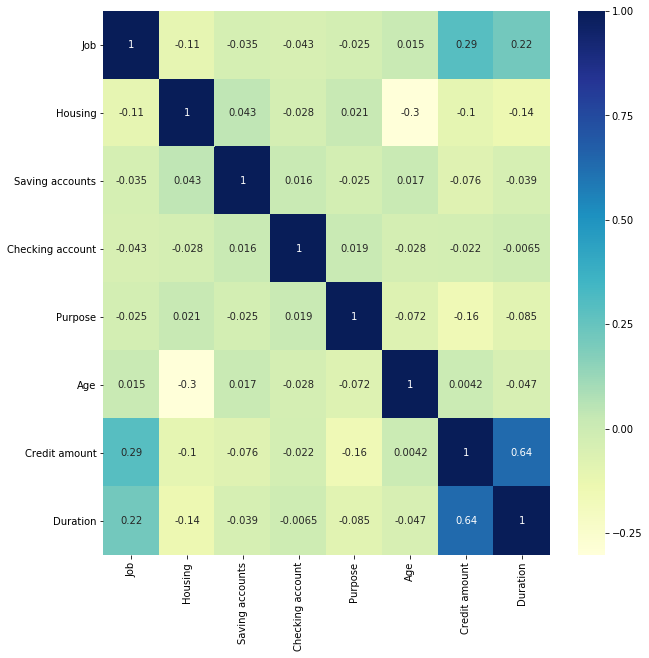

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(dfinal.iloc[:,1:16].corr(),annot=True, cmap="YlGnBu")

**Feature that has a significant impact is** Duration and Credit Amount, then **age** and **job**

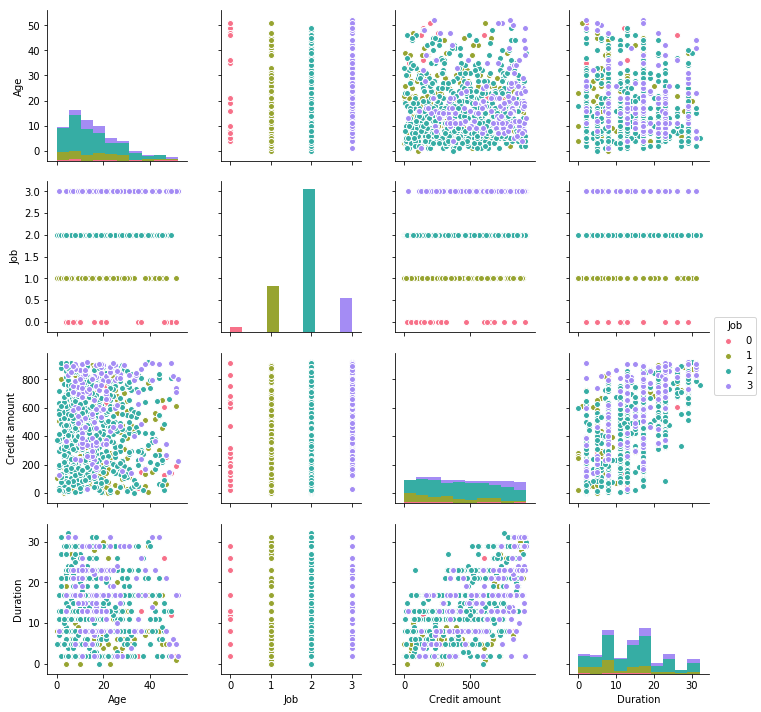

In [21]:
sns.pairplot(dfinal[["Age", "Job", "Credit amount", "Duration"]], hue='Job', diag_kind='hist', palette="husl")
plt.show()

## 5) Clustering Algorithm
First, in the following cells, I will retrive the dataset then I will visualize the dataset to decide the type of model we will use to model and analyse our clustering.

This clustering selected three feature from 2 significant variable *(duration, credit amount)* and *age*. This section is used to differentiate between customers based on segmentation:
1. Cluster 1 (**good creditor**): Customers who have a **low until average credit amount**, payment **duration** tends to be **fast**, and a **low risk** level
2. Cluster 2 (**medium risk creditor**): Customers who have an **average credit amount**, **average** payment **duration**, and **average risk** level
3. Cluster 3 (**high risk creditor**): Customers who have a **high credit amount**, **long** payment **duration**, and a **high** level of **risk**

In [22]:
#select coloumns
dfc = dfinal[['Age','Duration','Credit amount']]
dfc

,Age,Duration,Credit amount
0,48,2,142
1,3,29,770
2,30,8,390
3,26,26,848
4,34,17,734
...,...,...,...
995,12,8,310
996,21,21,661
997,19,8,69
998,4,27,332


In [23]:
#select coloumns
dfjd = dfinal[['Job','Duration','Credit amount']]
dfjd

,Job,Duration,Credit amount
0,2,2,142
1,2,29,770
2,1,8,390
3,2,26,848
4,2,17,734
...,...,...,...
995,1,8,310
996,3,21,661
997,2,8,69
998,2,27,332


### 5.1 K-Means
<i>[K-Means](https://en.m.wikipedia.org/wiki/K-means_clustering)<i> clustering aims to partition n observations into k clusters in which each observation belongs to the **cluster with the nearest mean**, serving as a prototype of the cluster.

In [24]:
#Selecting columns for clusterisation with k-means
select_cols = ["Age","Credit amount", "Duration"]
cluster_data = dfinal.loc[:,select_cols]

In [25]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(dfc["Age"], ax=ax1, color="y")
    sns.distplot(dfc["Credit amount"], ax=ax2, color="y")
    sns.distplot(dfc["Duration"], ax=ax3, color="y")
    plt.tight_layout()

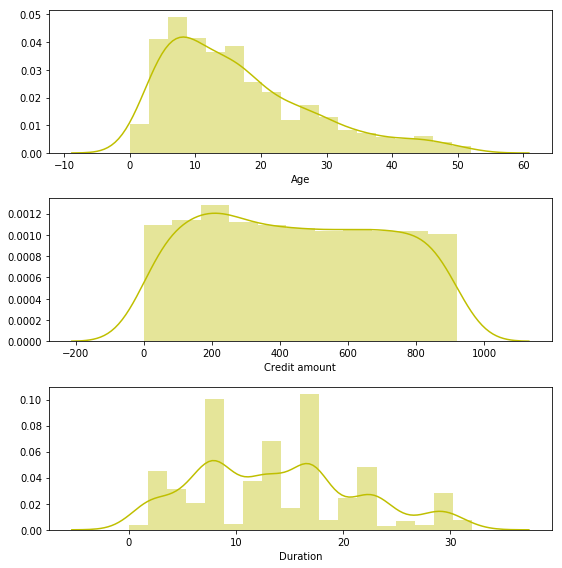

In [26]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)

In [27]:
# Conversion dataset to data array
dfcluster = np.asarray(cluster_data)

Text(0.5,0.92,'Customer Segmentation based on Age, Duration, and Credit Amount')

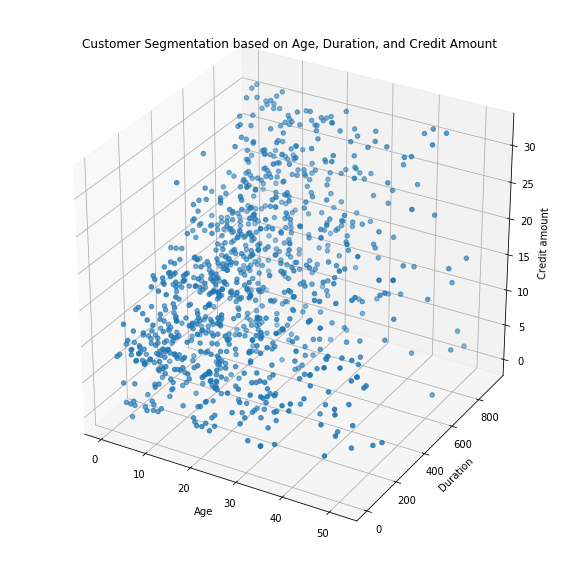

In [28]:
# Visualization data to scatterplot graphic 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfcluster[:,0], dfcluster[:,1], dfcluster[:,2], label='True Position')
ax.set_xlabel("Age")
ax.set_ylabel("Duration")
ax.set_zlabel("Credit amount")
ax.set_title("Customer Segmentation based on Age, Duration, and Credit Amount")

#### Scree Plot

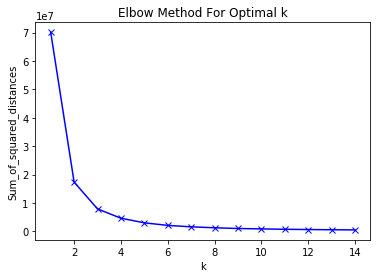

In [29]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dfcluster)
    Sum_of_squared_distances.append(km.inertia_) #y axis #inertia = sum  dari squared distrance

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Silhoutte

In [30]:
range_n_clusters = [3, 4, 5, 6]
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = n_cluster, max_iter =1000)
    kmeans.fit(dfcluster)
    labels = kmeans.predict(dfcluster)
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(dfcluster, labels)
    print(silhouette_avg)

0.5805066635399979
0.5467756416336242
0.532941051676275
0.5241829004222287


In [31]:
# Activation K-Means algorithm
kmeans = KMeans(n_clusters=3)
kmeans.fit(dfcluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
# Centorid value 
print(kmeans.cluster_centers_)

[[ 17.17977528 156.21910112   8.69101124]
 [ 16.83489097 763.1588785   19.58878505]
 [ 15.48297214 456.19814241  13.42414861]]


In [33]:
print(kmeans.labels_)

[0 1 2 1 1 1 2 1 2 1 0 1 0 0 0 0 2 1 1 2 2 2 2 2 2 0 0 0 2 1 2 1 1 0 0 1 1
 2 0 0 2 0 1 1 1 0 2 0 1 2 2 1 0 2 2 0 1 1 2 1 0 0 2 1 2 1 2 0 2 2 1 0 0 1
 2 0 1 1 1 1 1 0 0 2 2 0 0 1 2 0 0 0 0 1 0 1 2 2 2 1 0 2 0 2 2 1 1 1 1 0 0
 0 1 1 2 1 1 2 1 2 2 1 2 0 2 2 0 0 2 1 1 1 2 2 1 0 1 0 2 2 0 1 2 2 2 1 0 0
 1 0 0 2 1 1 1 0 0 0 1 2 2 0 0 1 0 2 0 0 1 2 0 0 2 0 2 1 2 0 2 0 1 1 0 1 0
 0 1 0 0 2 1 1 1 2 2 0 0 0 2 1 0 0 1 0 0 1 2 0 1 0 2 1 1 2 2 0 2 1 2 0 0 0
 0 2 1 2 1 1 0 2 1 2 2 0 0 2 1 2 0 2 0 0 1 0 1 0 0 0 2 0 0 2 2 1 2 1 2 2 1
 0 0 0 1 2 0 0 1 0 1 0 2 0 1 2 1 2 2 0 1 2 2 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1
 1 0 2 2 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 2 0 1 0 1 1 2 2 2 0 2 1 0 1 0 1 2 1
 1 1 2 2 0 1 0 1 1 2 1 1 0 0 1 2 0 0 0 2 1 0 0 2 1 0 2 0 2 2 2 2 0 1 1 1 2
 2 1 2 1 1 1 2 0 1 0 2 1 0 0 1 2 0 1 2 0 2 0 2 2 2 1 2 2 0 0 0 2 1 0 2 2 2
 0 2 0 2 1 2 0 0 1 2 1 2 0 2 2 0 0 2 2 2 0 0 0 1 1 2 2 2 0 0 0 2 0 2 0 2 0
 1 0 2 2 0 0 1 0 2 2 1 2 1 2 0 1 1 2 2 0 2 2 0 1 2 1 2 0 0 0 0 2 2 1 0 0 1
 0 1 0 0 0 2 1 0 1 2 1 0 

In [34]:
#Conversion dataset job with credit amount and duration to data array
dfjd = np.asarray(dfjd)

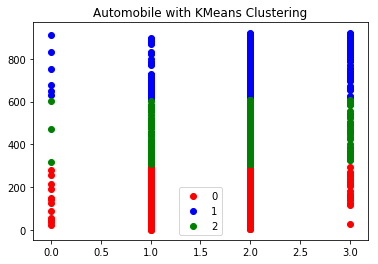

In [35]:
#Result Job
x = dfjd[:,0]
x1 = dfjd[:,2]
group= kmeans.labels_
color = ['red','blue','green']
fig, ax = plt.subplots()
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb, c=color[g], label=g)
ax.legend()
plt.title("Automobile with KMeans Clustering")
plt.show()

We can conclude that there is 3 cluster if we cluster the customer segmentation based on **job and credit amount**. It shows that different job has different average of credit amount.

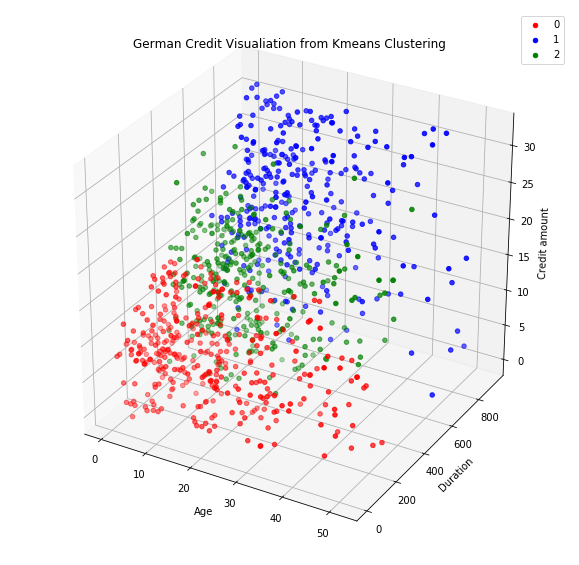

In [36]:
# Visualization the Result
x = dfcluster[:,0]
x1 = dfcluster[:,1]
x2 = dfcluster[:,2]
group= kmeans.labels_
color = ['red','blue','green']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Duration")
ax.set_zlabel("Credit amount")
plt.title("German Credit Visualiation from Kmeans Clustering")
plt.show()

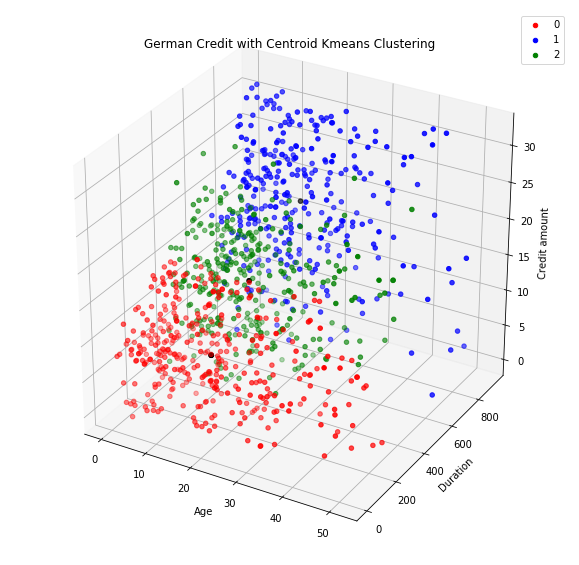

In [37]:
# Visualization of centroid
x = dfcluster[:,0]
x1 = dfcluster[:,1]
x2 = dfcluster[:,2]
group= kmeans.labels_
color = ['red','blue','green']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
    ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],color='black')
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Duration")
ax.set_zlabel("Credit amount")
plt.title("German Credit with Centroid Kmeans Clustering")
plt.show()

In [38]:
# Memasukkan hasil label ke dalam suatu 
data_clustered = pd.DataFrame(dfcluster)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)
data_clustered

array([[ 48, 142,   2,   0],
       [ 18,  23,   2,   0],
       [  1,  20,   8,   0],
       ...,
       [  2, 483,  19,   2],
       [ 18, 599,   0,   2],
       [ 38, 515,   8,   2]], dtype=int64)

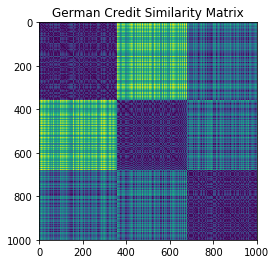

In [39]:
# Membuat similarity Matrix 
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.title("German Credit Similarity Matrix")
plt.show()

From Similarity Matrix we can conclude that every cluster has difference distance

In [40]:
cluster_data['KMeans_Cluster'] = pd.DataFrame(kmeans.labels_)
cluster_data.head()

,Age,Credit amount,Duration,KMeans_Cluster
0,48,142,2,0
1,3,770,29,1
2,30,390,8,2
3,26,848,26,1
4,34,734,17,1


In [41]:
#Peak minimum
grouped_km_min = cluster_data.groupby(cluster_data['KMeans_Cluster']).min().round(1)
grouped_km_min

,Age,Credit amount,Duration
KMeans_Cluster,,,
0,0,0,0
1,1,610,1
2,0,307,0


In [42]:
#Peak Maximum 
grouped_km_max = cluster_data.groupby(cluster_data['KMeans_Cluster']).max().round(1)
grouped_km_max

,Age,Credit amount,Duration
KMeans_Cluster,,,
0,52,306,23
1,52,920,32
2,47,609,29


In [43]:
grouped_km_avg = cluster_data.groupby(cluster_data['KMeans_Cluster']).mean().round(1)
grouped_km_avg

,Age,Credit amount,Duration
KMeans_Cluster,,,
0,17.1,156.6,8.7
1,16.8,763.2,19.6
2,15.5,456.7,13.5


In [44]:
a = cluster_data[cluster_data.KMeans_Cluster==2]
a

,Age,Credit amount,Duration,KMeans_Cluster
2,30,390,8,2
6,34,533,17,2
8,42,562,8,2
16,34,464,17,2
19,12,608,17,2
...,...,...,...,...
989,29,312,17,2
992,4,358,13,2
994,31,458,8,2
995,12,310,8,2


#### 5.1.1 Conclusion
Based on K-Means Clustering we get **n_cluster=3** and conclude that there is 3 clustered:
1. Cluster 1 (0): Cluster which have same criteria (age between 0 until 47 year with average old are 15 years old), Credit Amount are between 308 until 611 with average is 458.1 Deutsch Mark, and repayment duration between 0 until 29 with average repayment duration is 13 Month and 5 Week. This cluster has 321 member.
2. Cluster 2 (1): Cluster which have same criteria (age between 1 until 52 with average old are 16 years old, Credit Amount are between 612 until 920 with average is 764,1 Deutsch Mark, and repayment duration between 1 until 32 with average repayment duration is 19 Month and 6 Week. This cluster has 322 member.
2. Cluster 3 (2): Cluster which have same criteria (age between 0 until 52 with average old are 17 years old, Credit Amount are between 0 until 307 with average is 157.1 Deutsch Mark, and repayment duration between 0 until 23 with average repayment duration is 8 Month and 7 Week. This cluster has 357 member.

We can conclude that **Cluster 1 is Medium Creditor**, **Cluster 2 is High Risk Creditor**, and **Cluster 3 is Good Creditor**. We can conclude the cluster based of Credit Amount and Duration.<br>
From K-Means Clustering the most widely cluster is cluster 3 (good creditor).

### 5.2 Hierarchical Clustering
<i>[Hierarchical clustering](http://saedsayad.com/clustering_hierarchical.htm)<i> involves creating clusters that have a **predetermined ordering from top to bottom.**

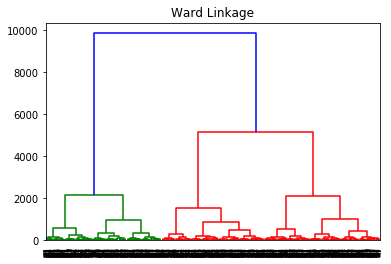

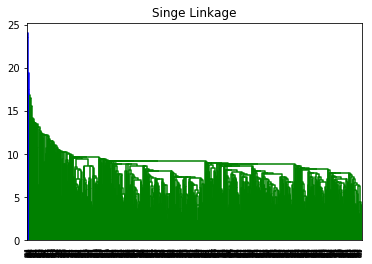

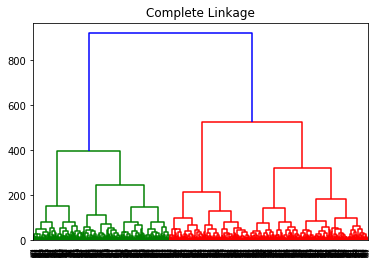

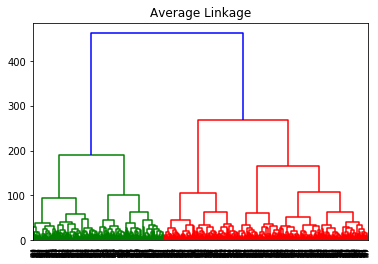

In [45]:
plt.figure()
dendrogram1 = sch.dendrogram(sch.linkage(dfcluster, method='ward'))
plt.title("Ward Linkage")
fig, ax = plt.subplots()
dendrogram2 = sch.dendrogram(sch.linkage(dfcluster, method='single'))
plt.title("Singe Linkage")
fig, ax = plt.subplots()
dendrogram3 = sch.dendrogram(sch.linkage(dfcluster, method='complete'))
plt.title("Complete Linkage")
fig, ax = plt.subplots()
dendrogram4 = sch.dendrogram(sch.linkage(dfcluster, method='average'))
plt.title("Average Linkage")
plt.show()

We can choose ward, complete, or average linkage. Because they have same number of n_clusters, which is 3 cluster. 

In [46]:
# Fitting hierarchical clustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(dfcluster)
labels = model.labels_
labels

array([2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0,
       0, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0,
       1, 2, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0,
       1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 0,
       0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0,
       1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2,
       1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2,
       2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1,
       0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1,
       2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2,

In [47]:
cluster_data['Hierarchical_Cluster'] = pd.DataFrame(labels)
cluster_data.head()

,Age,Credit amount,Duration,KMeans_Cluster,Hierarchical_Cluster
0,48,142,2,0,2
1,3,770,29,1,0
2,30,390,8,2,1
3,26,848,26,1,0
4,34,734,17,1,0


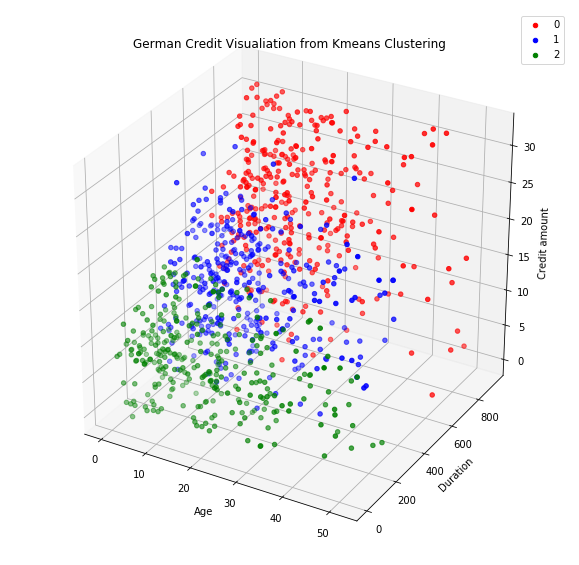

In [48]:
# Visualization the Result
x = dfcluster[:,0]
x1 = dfcluster[:,1]
x2 = dfcluster[:,2]
group= labels
color = ['red','blue','green']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(labels):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x2)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Duration")
ax.set_zlabel("Credit amount")
plt.title("German Credit Visualiation from Kmeans Clustering")
plt.show()

In [49]:
#Peak minimum
grouped_h_min = cluster_data.groupby(cluster_data['Hierarchical_Cluster']).min().round(1)
grouped_h_min

,Age,Credit amount,Duration,KMeans_Cluster,Hierarchical_Cluster
Hierarchical_Cluster,,,,,
0,1,583,0,1,0
1,0,255,0,0,1
2,0,0,0,0,2


In [50]:
#Peak maximum
grouped_h_max = cluster_data.groupby(cluster_data['Hierarchical_Cluster']).max().round(1)
grouped_h_max

,Age,Credit amount,Duration,KMeans_Cluster
Hierarchical_Cluster,,,,
0,52,920,32,2
1,47,587,29,2
2,52,262,23,0


In [51]:
#Peak average
grouped_h_avg = cluster_data.groupby(cluster_data['Hierarchical_Cluster']).mean().round(1)
grouped_h_avg

,Age,Credit amount,Duration,KMeans_Cluster
Hierarchical_Cluster,,,,
0,16.8,751.2,19.2,1.1
1,16.1,422.0,13.0,1.7
2,16.7,136.4,8.4,0.0


In [52]:
a = cluster_data[cluster_data.Hierarchical_Cluster==2]
a

,Age,Credit amount,Duration,KMeans_Cluster,Hierarchical_Cluster
0,48,142,2,0,2
10,6,190,8,0,2
13,41,149,17,0,2
14,9,232,11,0,2
15,13,183,17,0,2
...,...,...,...,...,...
976,45,56,2,0,2
979,6,178,11,0,2
985,6,241,11,0,2
987,45,233,9,0,2


#### 5.2.1 Conclusion
Based on Hierarchical Clustering we get **n_cluster=3** and conclude that there is 3 clustered:
1. Cluster 1 (0): Cluster which have same criteria (age between 1 until 52 year with average old are 16 years old), Credit Amount are between 583 until 920 with average is 751.2 Deutsch Mark, and repayment duration between 0 until 32 with average repayment duration is 19 Month and 2 Week. This cluster has 346 member.
2. Cluster 2 (1): Cluster which have same criteria (age between 0 until 52 with average old are 16 years old, Credit Amount are between 255 until 587 with average is 422.0 Deutsch Mark, and repayment duration between 0 until 29 with average repayment duration is 13 Month. This cluster has 346 member.
2. Cluster 3 (2): Cluster which have same criteria (age between 0 until 47 with average old are 16 years old, Credit Amount are between 0 until 262 with average is 136.4 Deutsch Mark, and repayment duration between 0 until 23 with average repayment duration is 8 Month and 4 Week. This cluster has 308 member.<br>

We can conclude that **Cluster 1 is High Risk Creditor**, **Cluster 2 is Medium Risk Creditor**, and **Cluster 3 is Good Creditor**. We can conclude the cluster based of Credit Amount and Duration.<br>
From Hierarchical Clustering the widely cluster is cluster 1 and 2 (high risk and medium risk creditor)

### 5.3 DBSCAN
<i>[DBSCAN](https://medium.com/@elutins/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818)<i> is a clustering method that is used in machine learning to separate clusters of **high density from clusters of low density**.

In [53]:
#Activate DBSCAN algoritm
dbscan = DBSCAN(eps=15,min_samples=3)
dbscan.fit(dfcluster)

DBSCAN(algorithm='auto', eps=15, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=1, p=None)

In [54]:
#Show label of DBSCAN algorithm
print(dbscan.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

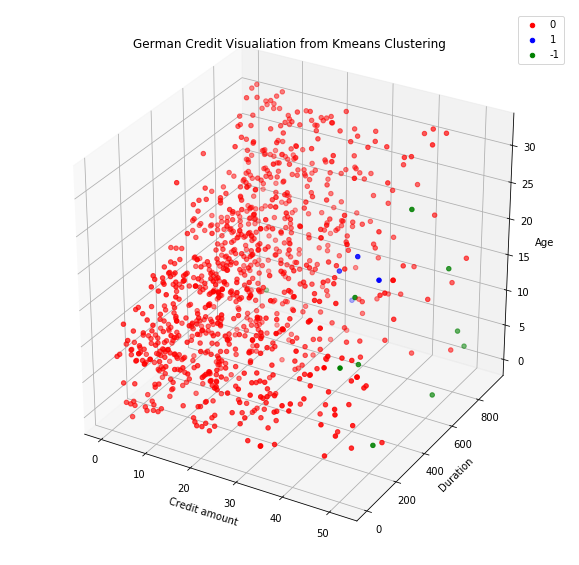

In [55]:
# Visualization the Result
x = dfcluster[:,0]
x1 = dfcluster[:,1]
x2 = dfcluster[:,2]
group= dbscan.labels_
color = ['red','blue','green']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(dbscan.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")
plt.title("German Credit Visualiation from Kmeans Clustering")
plt.show()

In [56]:
cluster_data['DBSCAN_Cluster'] = pd.DataFrame(dbscan.labels_)
cluster_data.head()

,Age,Credit amount,Duration,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,48,142,2,0,2,0
1,3,770,29,1,0,0
2,30,390,8,2,1,0
3,26,848,26,1,0,0
4,34,734,17,1,0,0


In [57]:
#Peak min
grouped_dbscan_min = cluster_data.groupby(cluster_data['DBSCAN_Cluster']).min().round(1)
grouped_dbscan_min

,Age,Credit amount,Duration,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
DBSCAN_Cluster,,,,,,
-1,4,124,1,0,0,-1
0,0,0,0,0,0,0
1,39,337,17,2,1,1


In [58]:
#Peak max
grouped_dbscan_max = cluster_data.groupby(cluster_data['DBSCAN_Cluster']).max().round(1)
grouped_dbscan_max

,Age,Credit amount,Duration,KMeans_Cluster,Hierarchical_Cluster
DBSCAN_Cluster,,,,,
-1,51,915,26,2,2
0,52,920,32,2,2
1,47,364,23,2,1


In [59]:
#Peak avg
grouped_dbscan_avg = cluster_data.groupby(cluster_data['DBSCAN_Cluster']).mean().round(1)
grouped_dbscan_avg

,Age,Credit amount,Duration,KMeans_Cluster,Hierarchical_Cluster
DBSCAN_Cluster,,,,,
-1,43.1,565.0,9.4,1.1,0.6
0,16.1,447.1,13.7,1.0,1.0
1,42.2,352.2,20.5,2.0,1.0


In [60]:
a = cluster_data[cluster_data.DBSCAN_Cluster==1]
a

,Age,Credit amount,Duration,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
62,42,364,23,2,1,1
213,47,348,21,2,1,1
781,41,360,17,2,1,1
928,39,337,21,2,1,1


#### 5.3.1 Conclusion
Based on DBSCAN Clustering we can conclude that there is 3 clustered:
1. Cluster 1 (-1): Cluster which have same criteria (age between 4 until 51 year with average old are 43 years old, Credit Amount are between 124 until 915 with average is 565 Deutsch Mark, and repayment duration between 1 until 26 with average repayment duration is 9 Month and 4 Week). This cluster has 10 member.
2. Cluster 2 (0): Cluster which have same criteria (age between 0 until 52 with average old are 16 years old, Credit Amount are between 0 until 920 with average is 447.1 Deutsch Mark, and repayment duration between 0 until 32 with average repayment duration is 13 Month and 7 Week. This cluster has 986 member.
2. Cluster 3 (1): Cluster which have same criteria (age between 39 until 47 with average old are 42 years old, Credit Amount are between 337 until 364 with average is 353.3 Deutsch Mark, and repayment duration between 17 until 23 with average repayment duration is 20 Month and 5 Week. This cluster has 4 member.<br>

We can conclude that **Cluster 1 is Good Creditor**, **Cluster 2 is Medium Risk Creditor**, and **Cluster 3 is High Risk Creditor**. We can conclude the cluster based of Credit Amount and Duration.<br>
From DBSCAN Clustering the most widely cluster is cluster 2 (medium risk creditor).

## 6) SUMMARY
### 6.1 Best Algorithm
From three algorithm above, I choose K-Means clustering. Actually the result between K-Means clustering is as same as Hierarchical Clustering. But the differences between them are:
1. Hierarchical clustering can’t handle big data well but K Means clustering can. This is because the time complexity of K Means is linear.
2. In K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering.
3. K Means is found to work well when the shape of the clusters is hyper spherical (like circle in 2D, sphere in 3D).
4. K Means clustering requires prior knowledge of K i.e. no. of clusters you want to divide your data into. But, you can stop at whatever number of clusters you find appropriate in hierarchical clustering by interpreting the dendrogram.<br>

While the result of **DBSCAN** can not represent the customer segmentation, because there is **noise**.

### 6.2 Customer Segmentation
**The creditor can be defined as the person who gives a loan to any other person and in return**, he expects to get some kind of interest on the loan he is giving. The creditor gives this loan for a particular time period and that time period can be small like few days or months or can be a few years also. Basically, he extends credit to any other persons. Thus by extending this loan or credit, he allows another person to repay this loan after a specific time period that may be with or without interest. 
From clustering model we can cluster customer into three segmentation.<br>
<br>Cluster 1 - medium mean of credit amount, middle time of duration, younger customers (**medium risk creditor**)
<br>Cluster 2 - high mean of credit amount, long duration, younger customers (**high risk creditor**)
<br>Cluster 3 - low mean of credit amount, short duration, older customers (**good creditor**)
### 6.3 Notes (Benefit for Client/Department)
Based on the result of customer segmentation, several things that can client/department do are:
1. Client / department can know how to retain creditor which has value low mean of credit amount and short duration.
2. Client / department can bind creditors who do a lot of credit with a certain time limit, so as to minimize bad credit based on the time of payment. So next time creditor with high risk can minimize their risk for the bank.
3. Client / department can make some rules for creditor to minimize the risk, i.e creditor must have job (skilled) --proved by visualization from pair plot and countplot-- and age with range 20-60 --proved by age which have a skilled job--
4. Client / department can make package of credit card for customer which did not has risk, medium risk, until high risk.
5. Client / department can give some promotion for credit's customer.